In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mibitrans as mbt

In [2]:
hydro = mbt.HydrologicalParameters(
    velocity=10,
    porosity=0.3,
    alpha_x=10,
    alpha_y=0,
    alpha_z=0,
)

In [3]:
att = mbt.AttenuationParameters(
    retardation=4,
    half_life=20,
    electron_acceptors=[5,20,33,7,2]
)

In [4]:
source = mbt.SourceParameters(
    source_zone_boundary=np.array([5,20,50]),
    source_zone_concentration=np.array([14,8,2]),
    total_mass="inf",
    depth=10,
)

In [5]:
model = mbt.ModelParameters(
    model_length=50,
    model_width=5,
    model_time=100,
    dx=1,
    dy=0.1,
    dt=1,
)

C:\Users\4662504\Documents\Projects\mibitrans\mibitrans\transport\model_parent.py:206: UserWarning: Source zone boundary is larger than model width. Model width adjusted to fit entire source zone.
  warnings.warn(


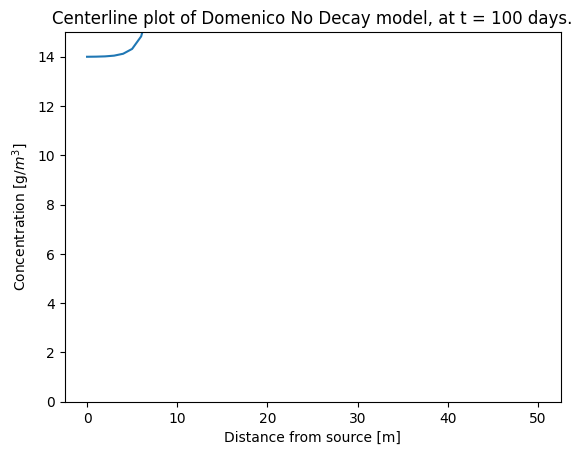

5.6813048190699545e+19


In [6]:
dom_nodecay = mbt.domenico.NoDecay(hydro, att, source, model, verbose=True)
mbt.centerline(dom_nodecay)
plt.ylim((0,15))
plt.show()
print(np.max(dom_nodecay.cxyt))

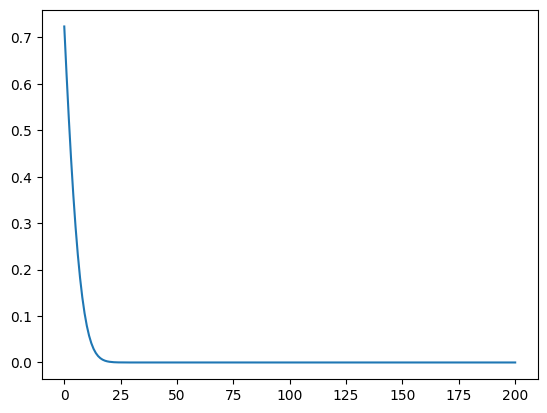

[9.71796397e-01 1.47547181e-01 4.20713711e-03 1.90003080e-05
 1.26666131e-08 1.20586873e-12 1.61076655e-17 2.98800232e-23
 7.64752833e-30 2.68884781e-37]


In [16]:
add_term = dom_nodecay._equation_term_additional_x(dom_nodecay.xxx, dom_nodecay.ttt)
plt.plot(dom_nodecay.x, add_term[-1,0,:])
plt.show()
print(add_term[0,0,:10])

In [9]:
term_exp, term_erfc = dom_nodecay.temp_additional_x(dom_nodecay.xxx, dom_nodecay.ttt)
print(term_exp[0,0,:50])
print(term_erfc[0,0,:50])
print(term_exp[0,0,:50] * term_erfc[0,0,:50])
# #plt.plot(dom_nodecay.x, term_exp[0,0,:])
# plt.show()
# plt.plot(dom_nodecay.x, term_erfc[1,0,:])
# plt.show()

[  1.           1.10517092   1.22140276   1.34985881   1.4918247
   1.64872127   1.8221188    2.01375271   2.22554093   2.45960311
   2.71828183   3.00416602   3.32011692   3.66929667   4.05519997
   4.48168907   4.95303242   5.47394739   6.04964746   6.68589444
   7.3890561    8.16616991   9.0250135    9.97418245  11.02317638
  12.18249396  13.46373804  14.87973172  16.44464677  18.17414537
  20.08553692  22.19795128  24.5325302   27.11263892  29.96410005
  33.11545196  36.59823444  40.44730436  44.70118449  49.40244911
  54.59815003  60.3402876   66.68633104  73.6997937   81.45086866
  90.0171313   99.48431564 109.94717245 121.51041752 134.28977968]
[7.23673610e-001 7.70998717e-002 1.46271659e-003 4.30277946e-006
 1.85057414e-009 1.13103133e-013 9.67220413e-019 1.14669008e-024
 1.87356647e-031 4.20203721e-039 1.29001389e-047 5.40976087e-057
 3.09412674e-067 2.41077137e-078 2.55637234e-090 3.68651515e-103
 7.22547820e-117 1.92378919e-131 6.95515437e-147 3.41319696e-163
 2.27295642e-18

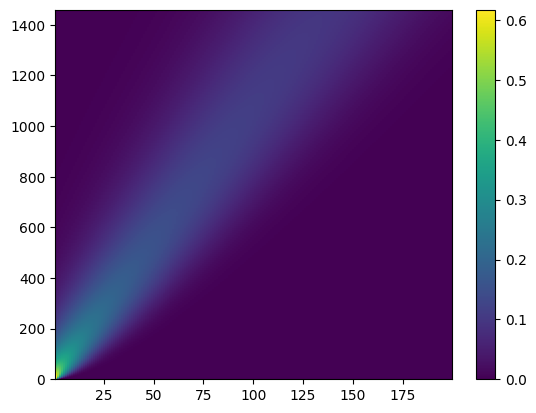

[[5.87708184e-01 9.48736696e-02 4.18221814e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.95321463e-01 5.29280550e-01 2.02994941e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.64872938e-01 7.39471875e-01 4.37148105e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.23927446e-04 2.52984899e-04 2.85558065e-04 ... 2.14616525e-01
  2.03569396e-01 1.92918724e-01]
 [2.21318232e-04 2.50037564e-04 2.82232109e-04 ... 2.17216424e-01
  2.06085306e-01 1.95350482e-01]
 [2.18739419e-04 2.47124565e-04 2.78944888e-04 ... 2.19833497e-01
  2.08618580e-01 1.97799743e-01]]
[[0.462058   0.29334331 0.21129897 ... 0.00355316 0.00353523 0.00351747]
 [0.56882735 0.41100649 0.31706998 ... 0.00614809 0.00611708 0.00608639]
 [0.59990962 0.45907633 0.36740117 ... 0.00792919 0.00788925 0.00784971]
 ...
 [0.18225195 0.18107059 0.17990385 ... 0.07890728 0.07867707 0.07844818]
 [0.18213991 0.18096074 0.17979616 ... 0.07891658 0.07868647 0.07845768]
 [0.18202808 0.18085109 0.1796

In [41]:
from scipy.special import erfcx

alpha_x = 13.3 / 3.281
v=113.8 / 3.281 / 365
xxx, ttt = np.arange(1, 200, 1)[None, :], np.arange(1, 4*365, 2)[:, None]
erfc_inner = (xxx + v * ttt) / (2 * np.sqrt(alpha_x * v * ttt))
exp_inner = xxx / alpha_x
exp_term = np.exp(exp_inner - erfc_inner**2)
erfc_term = erfcx(erfc_inner)
additional_term = exp_term * erfc_term
plt.pcolormesh(xxx, ttt, additional_term)
plt.colorbar()
plt.show()
#print(np.exp(2000 - np.max(erfc_inner)**2))
print(exp_term)
print(erfc_term)
print(additional_term)
print(np.max(erfc_term))
